## Pyber - Power of Plots
#### By Mudit Mathur

-From the scatterplot of Pyber Sharing Data, there is an inverse correlation between the number of rides per city and the average fare. 

-Also apparent from this scatterplot is that urban cities have distinctively more rides per city as well as drivers (from the size of the bubbles) than suburban cities, which have more than rural cities. 

-From the 3 pie charts (Total Fares by City Type, Total Rides by City Type, Total Drivers by City Type) it is evident that urban takes up by far the biggest slice of the pie.

-This shows the basic supply vs. demand tenet of economics. The rural areas have the highest average fare, with the least rides per city. And urban areas have the lowest average fare, with the most rides per city. Therefore, an increase in total number of rides drives down the price of the average fare with increased competition. 

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_city_ride = pd.merge(ride_df, city_df, on= "city", how = "left")

# Display the data table for preview
combined_city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
#Create a Data Frame: group by city and type
grouped_city = combined_city_ride.groupby(["city", "type"])


In [3]:
#Calculate the average fare per city
avg_fare_city = grouped_city["fare"].mean()

#Calculate the total number of rides per city
total_rides_city = grouped_city["ride_id"].count()

#Calculate the total number of drivers per city
total_drivers_city = grouped_city["driver_count"].first()

#Collect each city type
city_type = combined_city_ride.type.unique()

## Bubble Plot of Ride Sharing Data

In [4]:
#Create a new dataframe for ride sharing data we need
ride_share = pd.DataFrame({"Rides Per City": total_rides_city,
                  "Average Fare": avg_fare_city,
                  "Number of Drivers": total_drivers_city})

#Reset the index for table below 
ride_share = ride_share.reset_index()

#Display the data datble for preview 
ride_share.head(10)

,city,type,Rides Per City,Average Fare,Number of Drivers
0,Amandaburgh,Urban,18,24.641667,12
1,Barajasview,Urban,22,25.332273,26
2,Barronchester,Suburban,16,36.422500,11
3,Bethanyland,Suburban,18,32.956111,22
4,Bradshawfurt,Rural,10,40.064000,7
5,Brandonfort,Suburban,19,35.437368,10
6,Carriemouth,Urban,27,28.314444,52
7,Christopherfurt,Urban,27,24.501852,41
8,Colemanland,Suburban,22,30.894545,23
9,Davidfurt,Suburban,17,31.995882,23


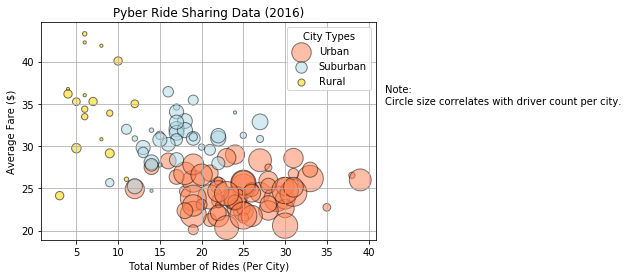

In [5]:
#Create a new data frame for each city type 
urban_city = ride_share.loc[(ride_share["type"] == "Urban")]
suburban_city = ride_share.loc[(ride_share["type"] == "Suburban")]
rural_city = ride_share.loc[(ride_share["type"] == "Rural")]

#X and Y coordinates, and total drivers for urban city 
x_urban = urban_city[['Rides Per City']]
y_urban = urban_city[['Average Fare']]
total_drivers_urban = urban_city[['Number of Drivers']]

#X and Y coordinates, and total drivers for suburban city 
x_suburban = suburban_city[['Rides Per City']]
y_suburban = suburban_city[['Average Fare']]
total_drivers_suburban = suburban_city[['Number of Drivers']]

#X and Y coordinates, and total drivers for rural city 
x_rural = rural_city[['Rides Per City']]
y_rural = rural_city[['Average Fare']]
total_drivers_rural = rural_city[['Number of Drivers']]


#Create a scatter plot for each city type 
plt.scatter(x_urban, y_urban, s = total_drivers_urban * 10,
            marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(x_suburban, y_suburban, s= total_drivers_suburban * 10,
            marker ='o', facecolors ="lightblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(x_rural, y_rural, s= total_drivers_rural * 10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")

#Set grid 
plt.grid()

# Create a legend
plt.legend(loc="upper right", title = "City Types")

# Create title, labels, and Note
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/bubble_plot.png")

#Display plot
plt.show()

## Total Fares by City Type

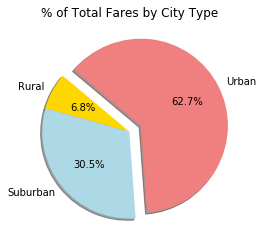

In [6]:
# Calculate Type Percents
fares_city_pie = combined_city_ride.groupby(["type"])["fare"].sum()

# Set labels 
labels = ["Rural", "Suburban", "Urban"]

# Set colors of each section of the pie chart
colors = ["gold", "lightblue", "lightcoral"]

# Explode out Urban slice of pie chart
explode = (0 ,0 ,0.15)

#Set Title
plt.title("% of Total Fares by City Type")

# Creates the pie chart based upon the values above
plt.pie(fares_city_pie, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/total_fares.png")

# Show Figure
plt.show()

## Total Rides by City Type

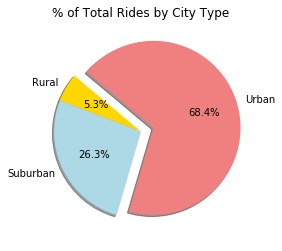

In [7]:
# Calculate Ride Percents
rides_city_pie = combined_city_ride.groupby(["type"])["ride_id"].count()

# Set labels
labels = ["Rural", "Suburban", "Urban"]

# Set colors of each section of the pie chart
colors = ["gold", "lightblue", "lightcoral"]

# Explode out Urban slice of pie chart
explode = (0 ,0 ,0.15)

#Set Title
plt.title("% of Total Rides by City Type")

# Creates the pie chart based upon the values above
plt.pie(rides_city_pie, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("../Images/total_rides.png")

# Show Figure
plt.show()

## Total Drivers by City Type

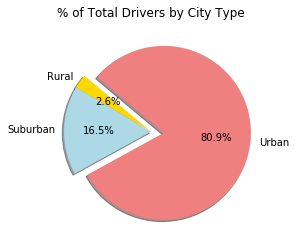

In [8]:
# Calculate Driver Percents
drivers_city_pie = city_df.groupby(["type"])["driver_count"].sum()

# Set labels
labels = ["Rural", "Suburban", "Urban"]

# Set the colors of each section of the pie chart
colors = ["gold", "lightblue", "lightcoral"]

# Explode out Urban slice of pie chart
explode = (0 ,0 ,0.15)

# Set Title
plt.title("% of Total Drivers by City Type")

# Creates the pie chart based upon the values above
plt.pie(drivers_city_pie, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Save Figure
plt.savefig("../Images/total_drivers.png")

# Show Figure
plt.show()